# Machine Learning Process

#### Import Library

In [1]:
from functions import *
from api_sample import _post_bids
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.datasets import load_boston # 데이터 셋 불러오기
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV
import matplotlib.pyplot as plt
import warnings # 경고지우기
warnings.filterwarnings(action='ignore') # 경고지우기

## XGBoost Regression

### gen0_mtemp (XGBoost)

#### Read_csv (gen0_weather1_1)

In [2]:
path = 'C:/Users/lhk65/OneDrive/Desktop/final/'
gen0_weather1_1 = pd.read_csv(path + 'gen0_weather1_1.csv')
gen0_weather1_1

,time,amount,year,month,day,hour,nins,mtemp,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,precip_1h
0,2022-07-21 01:00:00,0.0,2022,7,21,1,0.000000,24.800000,24.80,67.0,18.3,0.0,6.3,0.0,14.5,100.0,4359.0,3.3
1,2022-07-21 02:00:00,0.0,2022,7,21,2,0.000000,24.066667,24.50,81.0,21.1,0.0,14.6,0.0,8.0,100.0,4328.0,1.6
2,2022-07-21 03:00:00,0.0,2022,7,21,3,0.000000,24.015385,24.30,77.0,20.0,0.0,22.3,0.0,11.3,100.0,3718.5,1.9
3,2022-07-21 04:00:00,0.0,2022,7,21,4,0.000000,23.350000,22.40,78.0,18.5,23.0,14.0,0.0,6.4,62.0,4328.0,2.9
4,2022-07-21 05:00:00,0.0,2022,7,21,5,0.000000,22.200000,22.60,86.0,20.2,23.0,20.0,0.0,6.4,100.0,4328.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,2022-11-15 19:00:00,0.1,2022,11,15,19,3.166667,8.050000,9.45,69.0,4.1,338.0,6.8,0.0,17.7,48.0,6572.0,0.0
2807,2022-11-15 20:00:00,0.0,2022,11,15,20,0.000000,6.016667,8.35,81.0,5.2,0.0,2.9,0.0,16.1,18.0,12192.0,0.0
2808,2022-11-15 21:00:00,0.0,2022,11,15,21,0.000000,7.200000,8.90,77.0,5.2,0.0,18.2,0.0,8.0,100.0,792.0,0.1
2809,2022-11-15 22:00:00,0.0,2022,11,15,22,0.000000,7.775000,8.30,77.0,4.5,0.0,7.4,0.0,16.1,57.0,6096.0,0.0


#### Data Split for XGBoost

In [3]:
X, y = gen0_weather1_1.drop(['time','amount','nins','mtemp'], axis=1), gen0_weather1_1['mtemp']
#X_train, X_test, y_train, y_test = X[:2718], X[2718:2741], y[:2718], y[2718:2741]
X_train, X_test, y_train, y_test = X[:2695], X[2695:2718], y[:2695], y[2695:2718]

In [4]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.05, max_depth = 17, n_estimators = 170, importance_type='gain') # 파라미터 설정
xg_reg.fit(X_train, y_train)

[19:49:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=17, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=170, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [5]:
preds = xg_reg.predict(X_test)
preds

array([ 7.9622207,  7.0312743,  6.9218307,  7.1186256,  7.340547 ,
        4.7028646,  7.299346 ,  8.782933 ,  7.8186564, 12.881911 ,
       19.53355  , 30.417603 , 37.158974 , 36.262863 , 31.727308 ,
       33.87205  , 22.220518 , 21.02486  , 13.104869 ,  9.121233 ,
        7.657643 ,  8.950938 ,  7.158388 ], dtype=float32)

In [6]:
print('학습 정확도 :', xg_reg.score(X_train, y_train)) # 학습 정확도
print('검증 정확도 :', xg_reg.score(X_test, y_test)) # 검증 정확도

학습 정확도 : 0.9999880227147645
검증 정확도 : 0.9589175074694631


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

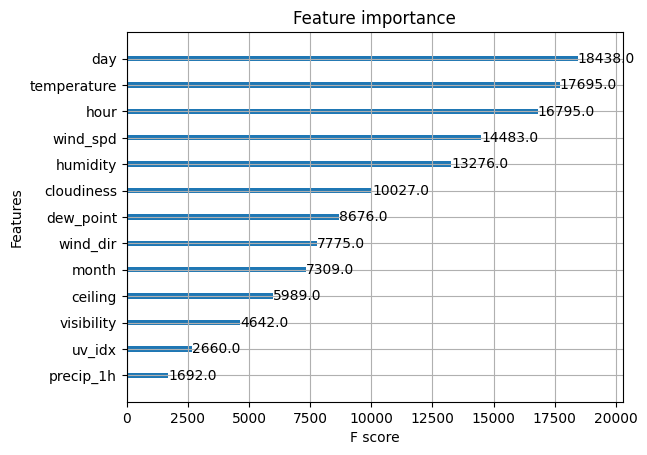

In [7]:
xgb.plot_importance(xg_reg)

## AdaBoost Regression

### gen0_nins (AdaBoost)

In [8]:
X, y = gen0_weather1_1.drop(['time','amount','nins'], axis=1), gen0_weather1_1['nins']
#X_train, X_test, y_train, y_test = X[:2718], X[2718:2741], y[:2718], y[2718:2741]
X_train, X_test, y_train, y_test = X[:2695], X[2695:2718], y[:2695], y[2695:2718]
X_test['mtemp'] = preds

In [9]:
nins_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=14), n_estimators=190, learning_rate=0.1, loss='linear')
nins_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=14),
                  learning_rate=0.1, n_estimators=190)

In [10]:
preds = nins_model.predict(X_test)
preds

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.33333333e-03,
       6.01818182e+01, 2.39727273e+02, 3.51545455e+02, 6.47166667e+02,
       7.07416667e+02, 6.62948135e+02, 5.23416667e+02, 5.77000000e+02,
       1.35750000e+02, 1.52000000e+02, 8.33333333e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [11]:
print('학습 정확도 :', nins_model.score(X_train, y_train)) # 학습 정확도
print('검증 정확도 :', nins_model.score(X_test, y_test)) # 검증 정확도

학습 정확도 : 0.9999971148908742
검증 정확도 : 0.9573719599091124


### gen0_amount (AdaBoost)

In [12]:
X, y = gen0_weather1_1.drop(['time','amount','mtemp'], axis=1), gen0_weather1_1['amount']
#X_train, X_test, y_train, y_test = X[:2718], X[2718:2741], y[:2718], y[2718:2741]
X_train, X_test, y_train, y_test = X[:2695], X[2695:2718], y[:2695], y[2695:2718]
X_test['nins'] = preds

In [13]:
amount_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12), n_estimators=175, learning_rate=0.05, loss='square')
amount_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.05, loss='square', n_estimators=175)

In [14]:
preds = amount_model.predict(X_test)
preds

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.40000001e-01, 1.60000000e+01,
       9.34000000e+01, 1.81399998e+02, 2.08272727e+02, 2.92742858e+02,
       2.90300000e+02, 2.28800000e+02, 1.43600006e+02, 1.39177777e+02,
       2.95000000e+01, 6.80000019e+00, 4.27272731e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [15]:
print('학습 정확도 :', amount_model.score(X_train, y_train)) # 학습 정확도
print('검증 정확도 :', amount_model.score(X_test, y_test)) # 검증 정확도

학습 정확도 : 0.9998895305042433
검증 정확도 : 0.9487577585532699


### gen2 (AdaBoost)

#### Read_csv (gen2_weather1_3)

In [16]:
path = 'C:/Users/lhk65/OneDrive/Desktop/final/'
gen2_weather1_3 = pd.read_csv(path + 'gen2_weather1_3.csv')
gen2_weather1_3

,time,amount,year,month,day,hour,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,cloudiness,ceiling,pressure,precip_1h
0,2020-10-01 01:00:00,0.0,2020,10,1,1,15.30,84.0,12.6,0.0,1.9,0.0,16.10,25.0,9144.0,1012.00,0.0
1,2020-10-01 02:00:00,0.0,2020,10,1,2,14.80,94.0,13.9,315.0,4.1,0.0,14.50,17.0,9144.0,1013.00,0.0
2,2020-10-01 03:00:00,0.0,2020,10,1,3,14.40,95.0,13.6,68.0,4.3,0.0,14.50,39.0,9144.0,1013.00,0.0
3,2020-10-01 04:00:00,0.0,2020,10,1,4,14.10,92.0,12.7,0.0,1.9,0.0,19.30,88.0,9144.0,1013.00,0.0
4,2020-10-01 05:00:00,0.0,2020,10,1,5,13.70,98.0,13.4,0.0,4.3,0.0,14.50,95.0,9144.0,1013.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18271,2022-11-15 19:00:00,0.0,2022,11,15,19,10.00,63.5,3.3,259.0,3.7,0.0,28.15,38.0,7824.5,1017.35,0.0
18272,2022-11-15 20:00:00,0.0,2022,11,15,20,7.75,68.5,1.0,281.5,0.7,0.0,33.80,0.5,11201.5,1018.55,0.0
18273,2022-11-15 21:00:00,0.0,2022,11,15,21,6.90,67.0,1.1,270.0,0.0,0.0,33.80,0.0,12192.0,1018.40,0.0
18274,2022-11-15 22:00:00,0.0,2022,11,15,22,6.90,79.0,3.5,0.0,1.9,0.0,20.90,0.0,12192.0,1018.00,0.0


In [17]:
X, y = gen2_weather1_3.drop(['time','amount','pressure'], axis=1), pd.to_numeric(gen2_weather1_3['amount'])
X_train, X_test, y_train, y_test = X[:18183], X[18183:18206], y[:18183], y[18183:18206]

In [18]:
gen2_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12), n_estimators=135, learning_rate=0.1, loss='square')
gen2_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.1, loss='square', n_estimators=135)

In [19]:
preds = pd.DataFrame(gen2_model.predict(X_test), columns=['pr_gen2'])
preds

,pr_gen2
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.118182
7,3.749000
8,15.884000
9,22.191077


In [20]:
print('학습 정확도 :', gen2_model.score(X_train, y_train)) # 학습 정확도
print('검증 정확도 :', gen2_model.score(X_test, y_test)) # 검증 정확도

학습 정확도 : 0.9893594123539632
검증 정확도 : 0.8786593124059112


### gen8 (AdaBoost)

#### Read_csv (gen8_weather2_1)

In [21]:
path = 'C:/Users/lhk65/OneDrive/Desktop/final/'
gen8_weather2_1 = pd.read_csv(path + 'gen8_weather2_1.csv')
gen8_weather2_1

,time,amount,year,month,day,hour,temperature,humidity,wind_dir,wind_spd,cloudiness,precip_1h
0,2020-10-01 01:00:00,0.0,2020,10,1,1,17.330,82.5,106.5,1.970,38.0,0.000
1,2020-10-01 02:00:00,0.0,2020,10,1,2,16.685,85.0,130.5,2.220,1.0,0.000
2,2020-10-01 03:00:00,0.0,2020,10,1,3,16.185,90.5,122.0,2.370,38.0,0.000
3,2020-10-01 04:00:00,0.0,2020,10,1,4,16.010,87.5,126.0,2.310,38.0,0.000
4,2020-10-01 05:00:00,0.0,2020,10,1,5,15.325,90.0,119.5,2.215,1.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
18413,2022-11-15 19:00:00,0.0,2022,11,15,19,11.485,57.5,274.5,3.805,82.0,0.000
18414,2022-11-15 20:00:00,0.0,2022,11,15,20,11.495,56.5,271.5,3.715,77.0,0.000
18415,2022-11-15 21:00:00,0.0,2022,11,15,21,7.890,87.0,10.0,4.375,100.0,0.150
18416,2022-11-15 22:00:00,0.0,2022,11,15,22,11.435,58.5,271.5,4.180,8.0,0.125


In [22]:
X, y = gen8_weather2_1.drop(['time','amount'], axis=1), pd.to_numeric(gen8_weather2_1['amount'])
X_train, X_test, y_train, y_test = X[:18323], X[18323:18347], y[:18323], y[18323:18347]

In [23]:
gen8_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12), n_estimators=170, learning_rate=0.1, loss='linear')
gen8_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.1, n_estimators=170)

In [24]:
preds = pd.DataFrame(gen8_model.predict(X_test), columns=['pr_gen8'])
preds

,pr_gen8
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.169000
7,4.350000
8,8.917111
9,20.896959


In [25]:
print('학습 정확도 :', gen8_model.score(X_train, y_train)) # 학습 정확도
print('검증 정확도 :',gen8_model.score(X_test, y_test)) # 검증 정확도

학습 정확도 : 0.9856331463322344
검증 정확도 : 0.6326783672787093


## Grid Search

In [ ]:
xgb_param_grid={
    'n_estimators' : [110,120,130,140,150,160,170,180,190,200],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'base_estimator__max_depth':[i for i in range(11,20,1)],
}

In [ ]:
amount_grid=GridSearchCV(amount_model, param_grid = xgb_param_grid, n_jobs=5, cv=3, verbose=True, refit=True, return_train_score=True)
amount_grid.fit(X_train, y_train)

In [ ]:
print(amount_grid.best_score_)
print(amount_grid.best_params_)

In [ ]:
amount_grid_df = pd.DataFrame(amount_grid.cv_results_)
amount_grid_df.loc[:, ['mean_test_score', "params"]]

In [ ]:
amount_grid_df[amount_grid_df['rank_test_score'] == 1]

## Prediction

In [38]:
path = 'C:/Users/lhk65/OneDrive/Desktop/final/'
forecast1 = pd.read_csv(path + 'forecast1.csv')
forecast1_3 = pd.read_csv(path + 'forecast1_3.csv')
forecast2 = pd.read_csv(path + 'forecast2.csv')

In [39]:
forecast1.drop(['fcst_time','precip_prob'], axis=1, inplace=True)
forecast1_3.drop(['fcst_time', 'precip_prob'], axis=1, inplace=True)
forecast2.drop(['fcst_time', 'pressure'], axis=1, inplace=True)

In [40]:
forecast1 = forecast1[8:32]
forecast1_3 = forecast1_3[8:32]
forecast2 = forecast2[8:32]

In [41]:
ymdh(forecast1)
ymdh(forecast1_3)
ymdh(forecast2)

In [42]:
forecast1 = forecast1[['time', 'year', 'month', 'day', 'hour', 'temperature', 'humidity', 'dew_point', 'wind_dir', 'wind_spd',
                       'uv_idx', 'visibility', 'cloudiness', 'ceiling', 'precip_1h']]
forecast1_3 = forecast1_3[['time', 'year', 'month', 'day', 'hour', 'temperature', 'humidity', 'dew_point', 'wind_dir', 'wind_spd',
                           'uv_idx', 'visibility', 'cloudiness', 'ceiling', 'precip_1h']]
forecast2 = forecast2[['time', 'year', 'month', 'day', 'hour', 'temperature', 'humidity', 
                       'wind_dir', 'wind_spd', 'cloudiness', 'precip_1h']]

### mtemp(pr)

In [43]:
mtemp_pr = pd.DataFrame(xg_reg.predict(forecast1.iloc[:,1:]))

In [44]:
forecast1.insert(5, 'mtemp',mtemp_pr.values)

### nins(pr)

In [45]:
nins_pr = nins_model.predict(forecast1.iloc[:,1:])

In [46]:
forecast1.insert(5, 'nins', nins_pr)
forecast1.drop('mtemp', axis=1, inplace=True)

### amount(pr)

In [47]:
amount = pd.DataFrame(amount_model.predict(forecast1.iloc[:,1:]))

In [49]:
amount

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.248000
7,11.200000
8,35.200001
9,110.199997


### gen2(pr)

In [52]:
gen2_amount = pd.DataFrame(gen2_model.predict(forecast1_3.iloc[:,1:]))
gen2_amount

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.130551
7,12.543500
8,29.181334
9,42.065625


In [53]:
gen2_amount['gen2'] = gen2_amount[0] * 4.728

### gen8(pr)

In [54]:
gen8_amount = pd.DataFrame(gen8_model.predict(forecast2.iloc[:,1:]))
gen8_amount

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.213000
7,2.675000
8,11.793000
9,19.043412


In [55]:
gen8_amount['gen8'] = gen8_amount[0] * 9.54

### avg of gen0, gen2, gen8

In [56]:
amount['pr'] = (amount[0] + gen2_amount['gen2'] + gen8_amount['gen8']) / 3

In [57]:
amount

,0,pr
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.248000,0.965755
7,11.200000,32.008389
8,35.200001,95.224856
9,110.199997,163.586807


### MA(Moving Average)

In [58]:
input_mat = amount[['pr']]

In [59]:
y1 = input_mat.iloc[:,[0]] 
x1 = np.zeros(shape= len(input_mat))
y1 = y1.to_numpy()

y2 = np.ravel(y1,order = 'c')
x2 = np.ravel(x1,order ='c')


first = True
for i in range(len(y2)):
    if first == True:
        Count = np.array([0])
        a = MovAvgFilter_batch(y2[i])
        first = False
    else:
        a = np.append(a,np.array(MovAvgFilter_batch(y2[i])))
        Count = np.append(Count, np.array([i]))
        i +=1
a = pd.DataFrame(a)

In [60]:
a

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.482877
7,16.487072
8,63.616623
9,129.405832


#### 13시부터 15시까지 MA값만 대체 하여 사용

## post_bids

In [ ]:
_post_bids()